In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import cufflinks as cf
from sklearn.metrics import accuracy_score

In [4]:
pyo.init_notebook_mode(connected = True)
cf.go_offline()

In [5]:
df = pd.read_csv(r'C:\Users\Anushka Mahajan\Desktop\python project\heart.csv')

In [6]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [8]:
df['target']

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [9]:
df.groupby('target').size()

target
0    499
1    526
dtype: int64

In [10]:
df.shape

(1025, 14)

In [11]:
df.size

14350

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [14]:
#Visualization

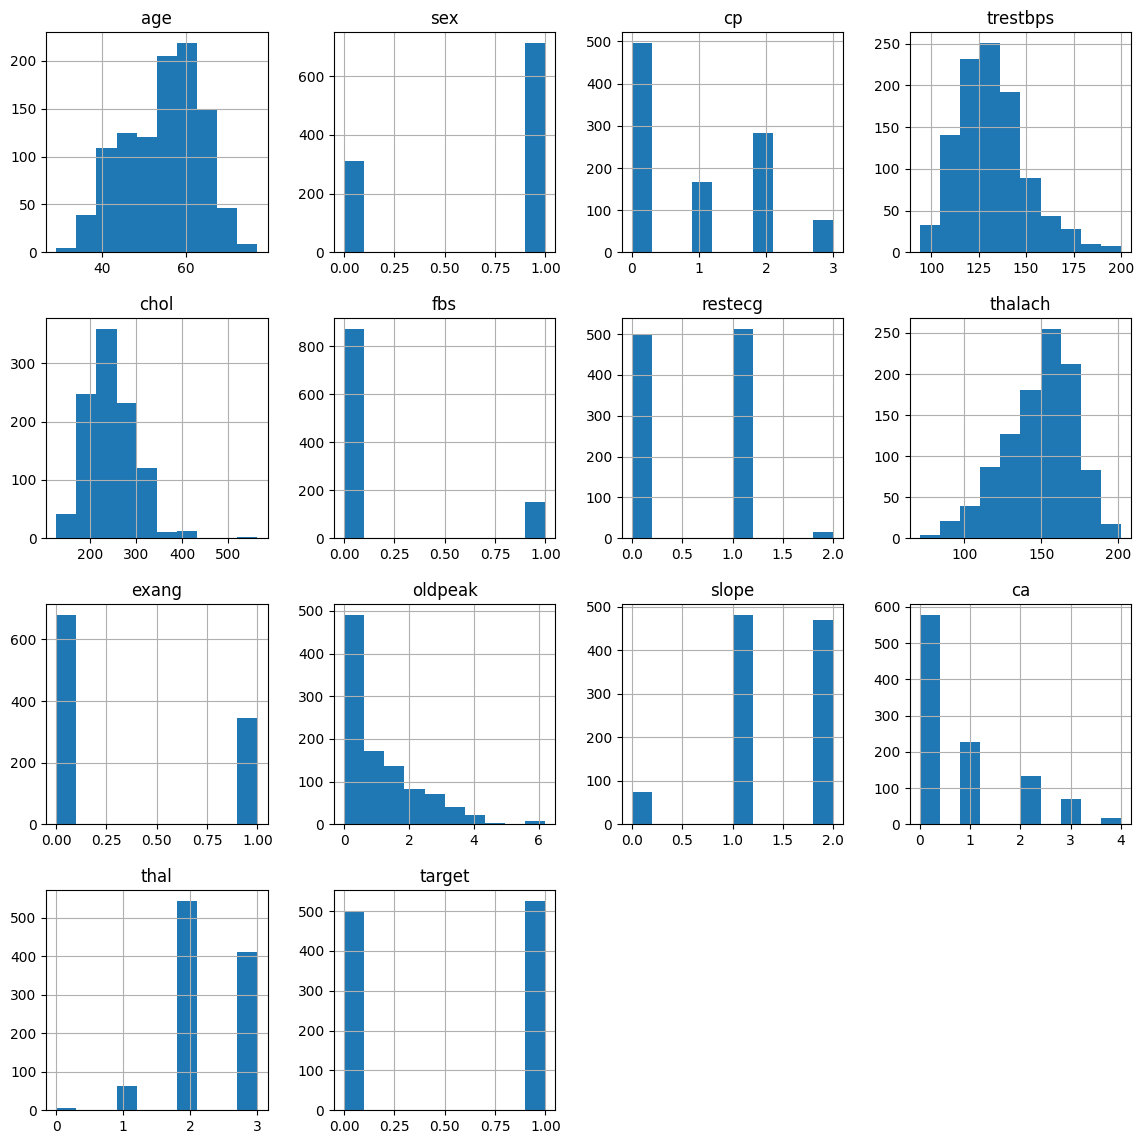

In [15]:
df.hist(figsize=(14,14))
plt.show()

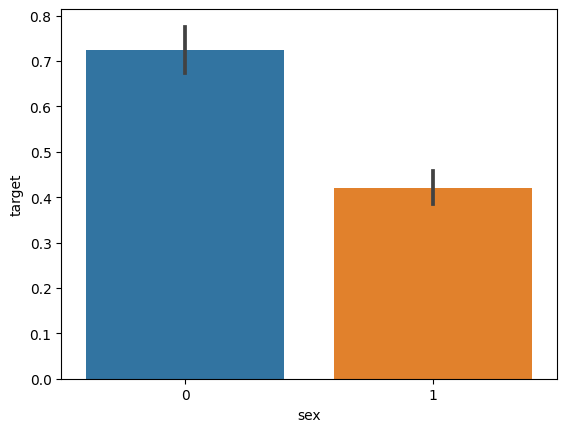

In [16]:
sns.barplot(data=df, x="sex", y="target")
plt.show()

<AxesSubplot: xlabel='sex', ylabel='age'>

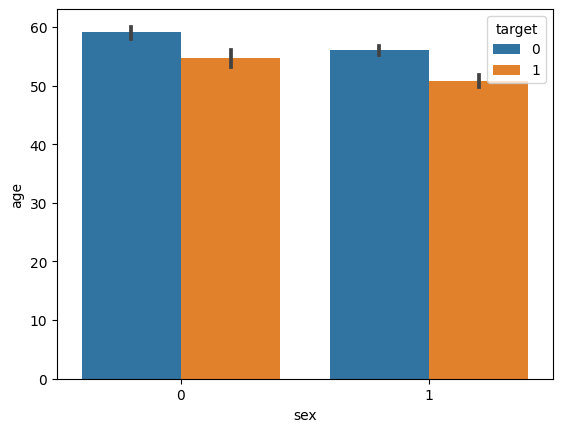

In [17]:
sns.barplot(data=df, x="sex", y="age",hue=df['target'])

In [18]:
px.bar(df,df['sex'],df['target'])

<AxesSubplot: >

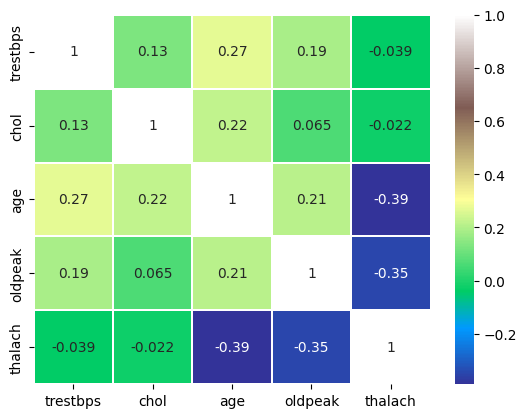

In [19]:
numeric_columns=['trestbps','chol','age','oldpeak','thalach']
sns.heatmap(df[numeric_columns].corr(),annot=True,cmap='terrain',linewidths=0.1)

In [20]:
#data Preprocessing

In [21]:
X,y=df.loc[:,:'thal'],df['target']

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [23]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler().fit(X)
X_std=std.transform(X)

In [25]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [26]:
X_std[0]

array([-0.26843658,  0.66150409, -0.91575542, -0.37763552, -0.65933209,
       -0.41887792,  0.89125488,  0.82132052, -0.71228712, -0.06088839,
        0.99543334,  1.20922066,  1.08985168])

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.3,shuffle=True)

In [29]:
X_train_std,X_test_std,y_train,y_test=train_test_split(X_std,y,random_state=10,test_size=0.3,shuffle=True)

In [30]:
X_train_std.shape

(717, 13)

In [31]:
X_train_std

array([[ 0.06240209,  0.66150409,  0.05593123, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-1.15067305,  0.66150409,  1.02761788, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [ 0.39324077,  0.66150409, -0.91575542, ...,  0.99543334,
         1.20922066,  1.08985168],
       ...,
       [-0.37871614,  0.66150409,  1.02761788, ...,  0.99543334,
        -0.73197147, -0.52212231],
       [-0.15815703, -1.51170646, -0.91575542, ..., -0.6241209 ,
        -0.73197147, -0.52212231],
       [ 0.834359  , -1.51170646, -0.91575542, ...,  0.99543334,
        -0.73197147, -0.52212231]])

In [32]:
X_test_std.shape

(308, 13)

In [33]:
y_test.size

308

In [34]:
#decision TRee classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_features=10)
dt.fit(X_train.values,y_train)

DecisionTreeClassifier(max_features=10)

In [36]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
620,57,1,0,152,274,0,1,88,1,1.2,1,1,3
181,64,1,3,110,211,0,0,144,1,1.8,1,0,2
546,70,1,0,130,322,0,0,109,0,2.4,1,3,2
618,49,1,1,130,266,0,1,171,0,0.6,2,0,2
822,60,1,0,130,253,0,1,144,1,1.4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,44,0,2,108,141,0,1,175,0,0.6,1,0,2
242,38,1,2,138,175,0,1,173,0,0.0,2,4,2
757,66,1,0,160,228,0,0,138,0,2.3,2,0,1
157,54,1,2,120,258,0,0,147,0,0.4,1,0,3


In [37]:
y_test

620    0
181    1
546    0
618    1
822    0
      ..
964    1
242    1
757    1
157    1
999    0
Name: target, Length: 308, dtype: int64

In [38]:
prediction = dt.predict(X_test.values)

In [39]:
prediction

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,

In [40]:
accuracy_dt=accuracy_score(y_test,prediction)*100

In [41]:
accuracy_dt

96.1038961038961

In [42]:
dt.feature_importances_

array([0.06559132, 0.01861864, 0.25014023, 0.02892606, 0.12092098,
       0.00638353, 0.01662788, 0.06689275, 0.01122438, 0.1049664 ,
       0.04464655, 0.16141574, 0.10364554])

In [43]:
def plot_feature_importance(model):
    plt.figure(figsize=(8,6))
    n_features=13
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),X)
    plt.xlabel("Features Importance")
    plt.ylabel("Features")
    plt.ylim(-1,n_features)

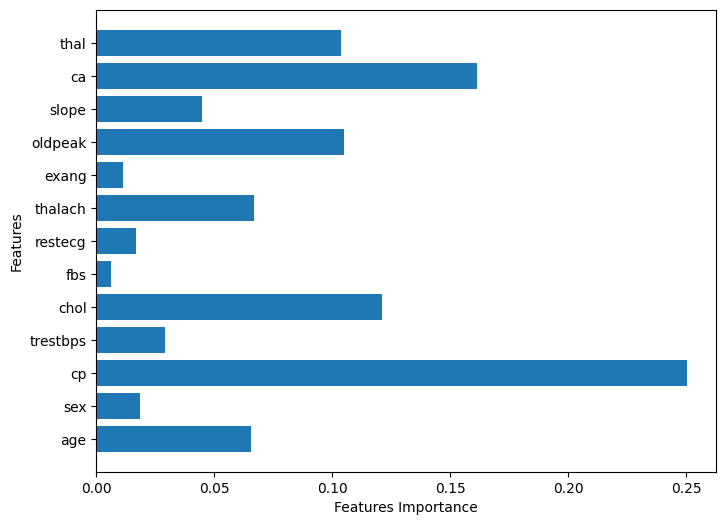

In [44]:
plot_feature_importance(dt)

In [45]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [46]:
Category=['No you dont have heart disease.','Yes you have heart disease']

In [47]:
custom_data=np.array([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]])

In [48]:
custom_data_prediction_dt=dt.predict(custom_data)

In [49]:
custom_data_prediction_dt

array([0], dtype=int64)

In [50]:
print(Category[int(custom_data_prediction_dt)])

No you dont have heart disease.


In [51]:
#KNN Algorithm

In [52]:
sc=StandardScaler().fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [53]:
X_test_std

array([[ 0.27431507,  0.67625223, -0.9225805 , ..., -0.61077567,
         0.24307241,  1.10622066],
       [ 1.04562452,  0.67625223,  1.98294024, ..., -0.61077567,
        -0.72516601, -0.50917692],
       [ 1.7067469 ,  0.67625223, -0.9225805 , ..., -0.61077567,
         2.17954925, -0.50917692],
       ...,
       [ 1.26599865,  0.67625223, -0.9225805 , ...,  1.005188  ,
        -0.72516601, -2.12457451],
       [-0.05624612,  0.67625223,  1.01443332, ..., -0.61077567,
        -0.72516601,  1.10622066],
       [ 1.37618571,  0.67625223, -0.9225805 , ..., -0.61077567,
         1.21131083,  1.10622066]])

In [54]:
from sklearn.neighbors import KNeighborsClassifier


knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_std,y_train)

KNeighborsClassifier(n_neighbors=1)

In [55]:
X_test_std

array([[ 0.27431507,  0.67625223, -0.9225805 , ..., -0.61077567,
         0.24307241,  1.10622066],
       [ 1.04562452,  0.67625223,  1.98294024, ..., -0.61077567,
        -0.72516601, -0.50917692],
       [ 1.7067469 ,  0.67625223, -0.9225805 , ..., -0.61077567,
         2.17954925, -0.50917692],
       ...,
       [ 1.26599865,  0.67625223, -0.9225805 , ...,  1.005188  ,
        -0.72516601, -2.12457451],
       [-0.05624612,  0.67625223,  1.01443332, ..., -0.61077567,
        -0.72516601,  1.10622066],
       [ 1.37618571,  0.67625223, -0.9225805 , ..., -0.61077567,
         1.21131083,  1.10622066]])

In [56]:
prediction_knn=knn.predict(X_test_std)

In [57]:
accuracy_knn=accuracy_score(y_test,prediction_knn)*100

In [58]:
accuracy_knn

95.12987012987013

In [59]:
custom_data_knn=np.array([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]])
k_range = range(1,26)
scores = {}

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_std,y_train)
    prediction_knn = knn.predict(X_test_std)
    scores[k] = accuracy_score(y_test,prediction_knn)*100
    

scores

{1: 95.12987012987013,
 2: 94.15584415584416,
 3: 90.5844155844156,
 4: 87.66233766233766,
 5: 87.01298701298701,
 6: 86.36363636363636,
 7: 84.74025974025975,
 8: 83.11688311688312,
 9: 85.71428571428571,
 10: 84.74025974025975,
 11: 86.03896103896103,
 12: 87.01298701298701,
 13: 87.33766233766234,
 14: 86.03896103896103,
 15: 86.03896103896103,
 16: 84.0909090909091,
 17: 83.76623376623377,
 18: 83.76623376623377,
 19: 82.46753246753246,
 20: 81.4935064935065,
 21: 82.14285714285714,
 22: 82.46753246753246,
 23: 82.14285714285714,
 24: 81.81818181818183,
 25: 81.81818181818183}

In [60]:
Custom_data_knn_std=std.transform(custom_data_knn)

C:\Users\Anushka Mahajan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [61]:
custom_data_prediction_knn=knn.predict(Custom_data_knn_std)

In [62]:
custom_data_prediction_knn

array([0], dtype=int64)

In [63]:
print(Category[int(custom_data_prediction_knn)])

No you dont have heart disease.


In [64]:
#Logistic regression

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
model = LogisticRegression()

In [68]:
#training the model
model.fit(X_train,y_train)


C:\Users\Anushka Mahajan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [69]:
#model evaluation
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)

In [70]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8647140864714087


In [77]:
#accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,y_test)*100

In [78]:
print('Accuracy on test data: ',test_data_accuracy)

Accuracy on test data:  86.68831168831169


In [79]:
#building predictive system
input_data = (52,1,0,125,212,0,1,168,0,1,2,2,3)
#change input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

#reshape the numpy array as we are predicting only for one instance
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[0]


C:\Users\Anushka Mahajan\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



In [80]:
print(Category[int(prediction)])

No you dont have heart disease.


<AxesSubplot: xlabel='Algorithms', ylabel='Accuracy score'>

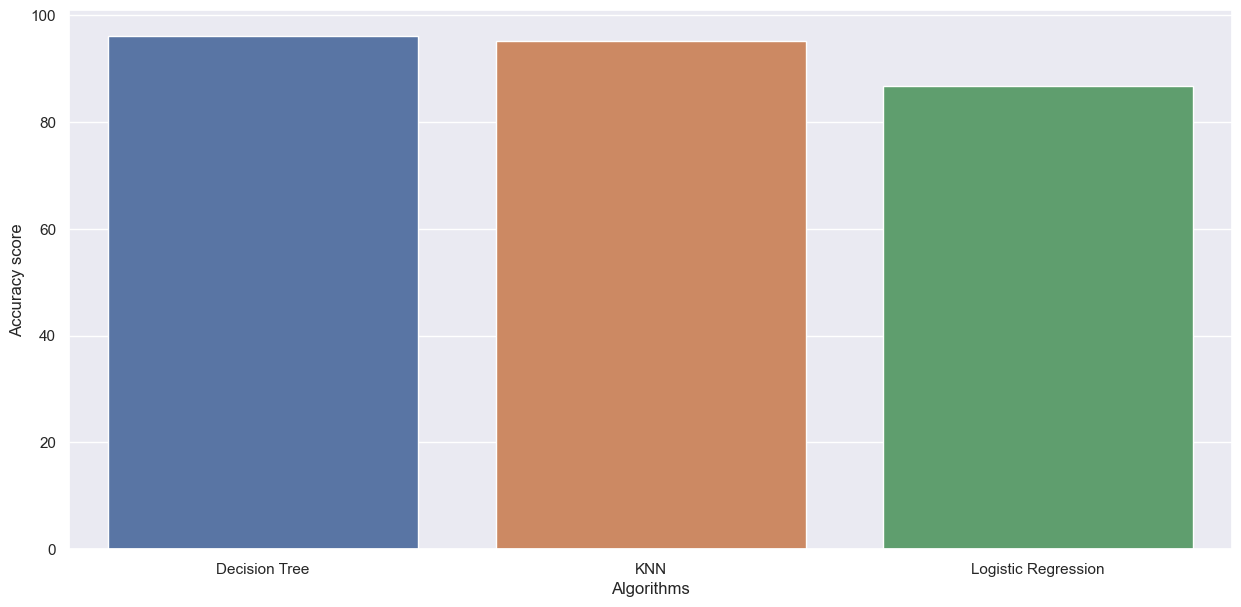

In [81]:
#comparison of Algorithm
algorithms=['Decision Tree','KNN','Logistic Regression']
scores=[accuracy_dt,accuracy_knn,test_data_accuracy]


# In[93]:


sns.set(rc={'figure.figsize':(15,7)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(data=df,x=algorithms,y=scores)

In [82]:
import pickle
filename = 'heart_model.sav'
pickle.dump(dt,open(filename,'wb'))

loaded_model = pickle.load(open('heart_model.sav','rb'))